# Analysis of Product Category Variable using NLP

## Semantic similarity between product categories -> K means

In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import nltk
import transformers
import scipy
import sklearn

In [11]:
amazon_data = pd.read_csv('../Datasets/cleaned_data_nlp.csv').drop(columns = ['Unnamed: 0'])
amazon_data['clean_category'] = amazon_data['clean_category'].apply(eval)  # converts to a set
category_df = pd.read_csv('../Category-Centric-Datasets/category_data.csv').drop(columns = ['Unnamed: 0'])

In [12]:
cat_list = category_df['category'].tolist()
cat_list

['Sports & Outdoors',
 'Clothing',
 'Shoes & Jewelry',
 'Automotive',
 'Industrial & Scientific',
 'Sports & Fitness',
 'Tools & Home Improvement',
 'Home & Kitchen',
 'Health & Household',
 'Replacement Parts',
 'Women',
 'Grocery & Gourmet Food',
 'Kitchen & Dining',
 'Outdoor Recreation',
 'Accessories',
 'Shops',
 'Electronics',
 'Men',
 'Toys & Games',
 'Office Products',
 'Patio',
 'Lawn & Garden',
 'Crafts & Sewing',
 'Arts',
 'Musical Instruments',
 'Pantry Staples',
 'Pet Supplies',
 'Power & Hand Tools',
 'Baby',
 'Beauty & Personal Care',
 'Office Supplies',
 'Hunting & Fishing',
 'Team Sports',
 'Computers & Accessories',
 'Motorcycle & ATV',
 'Instrument Accessories',
 'Camera & Photo',
 'Home Décor',
 'Fan Shop',
 'Girls',
 'Dogs',
 'Health Care',
 'Medical Supplies & Equipment',
 'Boys',
 'Performance Parts & Accessories',
 'House Supplies',
 'Cycling',
 'Parts',
 'Accessories & Supplies',
 'Shoes',
 'Furniture',
 'Vitamins & Dietary Supplements',
 'Bedding',
 'Power Too

In [13]:
from sentence_transformers import SentenceTransformer

In [14]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [15]:
if torch.cuda.is_available():
        device = torch.device('cuda:0')
        print('Running on GPU')
        print(torch.cuda.get_device_name(0))
else:   
    device = torch.device('cpu')
    print('Running on CPU')

Running on GPU
GeForce MX250


In [19]:
cat_embeddings = model.encode(cat_list, show_progress_bar=False)
cat_embeddings

array([[ 0.5592073 , -0.86118346,  1.8882433 , ...,  0.30373862,
        -0.74210054, -0.09859207],
       [ 0.61392426, -1.0210379 ,  1.6953125 , ...,  0.08544323,
        -0.35437107, -0.37547502],
       [ 0.7672335 , -0.04119372,  1.0019894 , ..., -0.37363565,
        -0.8154867 , -0.74389553],
       ...,
       [ 0.05154082,  0.21941689,  0.9410564 , ...,  0.1265108 ,
         0.40804583, -0.39985228],
       [ 0.55097926, -0.57766825,  1.4280589 , ...,  0.89438766,
         0.37720776,  0.02834453],
       [ 0.4905173 , -0.18066515,  1.6529633 , ...,  0.25797543,
        -0.5041143 , -0.5503925 ]], dtype=float32)

In [17]:
# from sklearn.preprocessing import normalize
# cat_embeddings = normalize(cat_embeddings, axis = 1)  # when normalized, euclidean distance = cosine similarity
# cat_embeddings.shape                                    # but euclidean distance seems to work better

### K Means clustering based on semantic similarity

In [57]:
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 25

clustering_model = KMeans(n_clusters=num_clusters, random_state = 0)
clustering_model.fit(cat_embeddings)
cluster_assignment = clustering_model.labels_
cluster_assignment

array([23,  4,  0, ..., 17,  5, 20])

In [58]:
clusters = []
for i in range(num_clusters): 
    clusters.append([])
for i in range(len(cluster_assignment)):
    clusters[cluster_assignment[i]].append(cat_list[i])

In [59]:
clusters[0][1:20]

['Crafts & Sewing',
 'Beauty & Personal Care',
 'Jewelry',
 'Sewing',
 'Hair Care',
 'Lingerie',
 'Costumes & Accessories',
 'Jewelry & Watch Accessories',
 'Sewing Notions & Supplies',
 'Beading & Jewelry Making',
 'Maternity',
 'Body Jewelry',
 'Dresses',
 'Charms & Charm Bracelets',
 'Fashion Hoodies & Sweatshirts',
 'Jewelry Accessories',
 'Skirts',
 'Dressing Up & Costumes',
 'Hair Coloring Products']

In [60]:
category_df['cluster_assignment'] = cluster_assignment
category_df

,category,frequency,avg_rating,avg_price,avg_num_reviews,cluster_assignment,TSNE_X_coord,TSNE_Y_coord
0,Sports & Outdoors,1390,4.376691,49.290036,436.865468,23,-7.735241,0.943708
1,Clothing,1358,4.347054,36.191775,648.265832,4,-3.222924,-1.922009
2,Shoes & Jewelry,1111,4.341404,36.406724,682.820882,0,0.707048,-2.646481
3,Automotive,1109,4.411903,59.004734,173.338142,9,-3.560742,-8.436682
4,Industrial & Scientific,886,4.429684,54.669944,286.321670,7,2.216065,-8.358309
...,...,...,...,...,...,...,...,...
6651,Cylinder Hoses,1,4.400000,27.030000,2.000000,24,7.703021,0.700044
6652,Guiders & Wedges,1,4.000000,179.990000,10.000000,7,-2.252394,-2.476031
6653,Infant & Toddler Beds,1,4.700000,100.485000,7486.000000,17,5.042560,-3.254953
6654,Compression Bandages,1,4.700000,18.340000,551.000000,5,2.273054,0.758971


In [61]:
cat0 = category_df[category_df['category'].apply(lambda x: x in clusters[0])]
cat0.mean()

frequency              12.578378
avg_rating              4.374273
avg_price              26.618180
avg_num_reviews       619.413023
cluster_assignment      0.000000
TSNE_X_coord            0.732927
TSNE_Y_coord           -1.576775
dtype: float64

In [62]:
cluster_means = []
for i in range(num_clusters):
    cluster_means.append(category_df[category_df['category'].apply(lambda x: x in clusters[i])].mean())

In [63]:
cluster_df = pd.concat(cluster_means, axis = 1)
cluster_df = cluster_df.transpose()
cluster_df

,frequency,avg_rating,avg_price,avg_num_reviews,cluster_assignment,TSNE_X_coord,TSNE_Y_coord
0,12.578378,4.374273,26.618180,619.413023,0.0,0.732927,-1.576775
1,6.060423,4.396096,46.738734,374.024659,1.0,-2.078754,1.310378
2,3.666667,4.468615,45.548380,623.131459,2.0,-3.701179,0.440499
3,4.807229,4.408980,47.898408,391.179368,3.0,-5.897504,1.816936
4,8.318792,4.326546,44.009101,441.203580,4.0,-2.120031,-1.988250
5,4.424000,4.390213,33.974156,737.559987,5.0,4.471347,2.192413
6,2.215247,4.359618,47.855672,436.599912,6.0,-2.347407,3.815046
7,10.123404,4.396425,61.728192,427.501993,7.0,-2.509445,-3.170013
8,2.340708,4.314131,33.450187,449.919932,8.0,4.067806,8.987729
9,7.323944,4.420898,65.520202,207.025040,9.0,-2.084435,-8.016253


#### Finding the centers of each cluster

In [64]:
cluster_centers =[]
for i in range(num_clusters): 
    center_point = clustering_model.cluster_centers_[i, :]
    distances = np.linalg.norm(np.array(cat_embeddings) - center_point, axis = 1)
    min_word = np.argmin(distances)
    cluster_centers.append(cat_list[min_word])

cluster_df.insert(0, "cluster_center", cluster_centers)
cluster_df

,cluster_center,frequency,avg_rating,avg_price,avg_num_reviews,cluster_assignment,TSNE_X_coord,TSNE_Y_coord
0,Coverlets & Sets,12.578378,4.374273,26.618180,619.413023,0.0,0.732927,-1.576775
1,Totes,6.060423,4.396096,46.738734,374.024659,1.0,-2.078754,1.310378
2,Cases & Bags,3.666667,4.468615,45.548380,623.131459,2.0,-3.701179,0.440499
3,Ball Ornaments,4.807229,4.408980,47.898408,391.179368,3.0,-5.897504,1.816936
4,Vests,8.318792,4.326546,44.009101,441.203580,4.0,-2.120031,-1.988250
5,Respirator Parts,4.424000,4.390213,33.974156,737.559987,5.0,4.471347,2.192413
6,Hasps,2.215247,4.359618,47.855672,436.599912,6.0,-2.347407,3.815046
7,Systems & Kits,10.123404,4.396425,61.728192,427.501993,7.0,-2.509445,-3.170013
8,Oatmeal,2.340708,4.314131,33.450187,449.919932,8.0,4.067806,8.987729
9,Wheels & Accessories,7.323944,4.420898,65.520202,207.025040,9.0,-2.084435,-8.016253


In [86]:
clusters[0][1:10]

['Crafts & Sewing',
 'Beauty & Personal Care',
 'Jewelry',
 'Sewing',
 'Hair Care',
 'Lingerie',
 'Costumes & Accessories',
 'Jewelry & Watch Accessories',
 'Sewing Notions & Supplies']

#### Visualize clusters by price, number of reviews, rating

In [87]:
from wordcloud import WordCloud

##### by price

In [88]:
cluster_freq = dict(zip(list(cluster_df["cluster_center"].values), list(cluster_df["avg_price"].values) ))

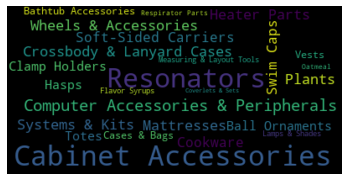

In [89]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=cluster_freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [90]:
# cluster_df.to_csv('../Category-Centric-Datasets/clustered_categories0_25.csv')

#### by price, reviews, rating

In [73]:
%%html
<iframe src="https://preview.flourish.studio/6271552/JdyHe8VmubC6MQsyATghtD5Dbxr-JDSw7FsId8AOXJ1NJ_UQxCB0LHyu2mmsKZ9j/" width="1000" height="600"></iframe>

### Plotting K means clusters

#### Trying to use just PCA to project to 2D


In [74]:
# Trying to use just PCA

from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
cat_pca = pca.fit_transform(cat_embeddings)
 
cat_pca.shape

(6656, 2)

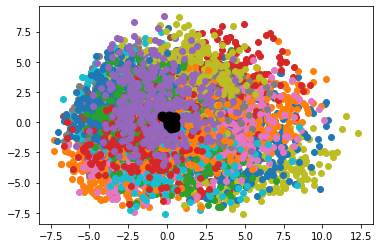

In [75]:
for i in range(num_clusters): 
    cat_2d = cat_pca[category_df[category_df['cluster_assignment']==i].index, :]
    plt.scatter(cat_2d[:, 0], cat_2d[:, 1])

centroids = clustering_model.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')

#### Using TSNE to project to 2D 

In [76]:
from sklearn.manifold import TSNE

In [77]:
# optionally perform pca to 50d first
pca = PCA(50)
cat_pca50 = pca.fit_transform(cat_embeddings)
cat_pca50.shape

(6656, 50)

In [78]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(cat_embeddings)  # can be changed to cat_pca50 

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6656 samples in 0.016s...
[t-SNE] Computed neighbors for 6656 samples in 1.311s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6656
[t-SNE] Computed conditional probabilities for sample 2000 / 6656
[t-SNE] Computed conditional probabilities for sample 3000 / 6656
[t-SNE] Computed conditional probabilities for sample 4000 / 6656
[t-SNE] Computed conditional probabilities for sample 5000 / 6656
[t-SNE] Computed conditional probabilities for sample 6000 / 6656
[t-SNE] Computed conditional probabilities for sample 6656 / 6656
[t-SNE] Mean sigma: 4.213665
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.708687
[t-SNE] KL divergence after 300 iterations: 3.082014


In [79]:
tsne_results.shape

(6656, 2)

In [80]:
category_df["TSNE_X_coord"] = tsne_results[:, 0]
category_df["TSNE_Y_coord"] = tsne_results[:, 1]
category_df

,category,frequency,avg_rating,avg_price,avg_num_reviews,cluster_assignment,TSNE_X_coord,TSNE_Y_coord
0,Sports & Outdoors,1390,4.376691,49.290036,436.865468,23,-4.943245,-1.478469
1,Clothing,1358,4.347054,36.191775,648.265832,4,3.027563,-2.781297
2,Shoes & Jewelry,1111,4.341404,36.406724,682.820882,0,2.709005,-1.856251
3,Automotive,1109,4.411903,59.004734,173.338142,9,1.677505,-8.417171
4,Industrial & Scientific,886,4.429684,54.669944,286.321670,7,-2.452302,-8.029575
...,...,...,...,...,...,...,...,...
6651,Cylinder Hoses,1,4.400000,27.030000,2.000000,24,-5.708699,2.966823
6652,Guiders & Wedges,1,4.000000,179.990000,10.000000,7,-1.728973,-3.651643
6653,Infant & Toddler Beds,1,4.700000,100.485000,7486.000000,17,-5.016997,-1.054774
6654,Compression Bandages,1,4.700000,18.340000,551.000000,5,-1.013702,1.217779


In [81]:
# category_df.to_csv('../Results/category_df_clustered0_25.csv')

In [85]:
%%html
<iframe src="https://preview.flourish.studio/6271613/vU8DSeEG66OneDcGBmpRHdnUbaEWPoNUhWbThkrtu9zb5g0Pj507sOIPr0QtGbFa/" width="1000" height="800"></iframe>

## References 
* https://towardsdatascience.com/cutting-edge-semantic-search-and-sentence-similarity-53380328c655